## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [5]:
X = df[['Age','EstimatedSalary']]
Y = df['Purchased']

## Print count of each label in Purchased column

In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [7]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state=0)

## Train the model with random_state = 0

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [10]:
logreg.fit(x_train, y_train)

LogisticRegression()

## Print the prediction results

In [11]:
prediction = logreg.predict(x_test)

In [12]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


## Create dataframe with the Actual Purchased and Predict Purchased

In [14]:
df2 = x_test.copy()
df2['Actual_Purchased'] = y_test
df2['Predict_Purchased'] = prediction

In [15]:
df2

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [16]:
(df2['Actual_Purchased'] == df2['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,prediction)

array([[68,  0],
       [32,  0]])

In [18]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



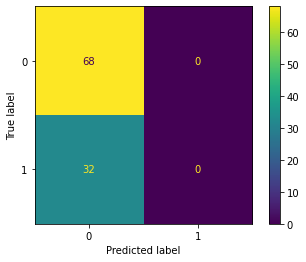

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, x_test, y_test)
plt.grid(False);

## Use StandardScaler() to improved performance and re-train your model

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
sc_predection = pipe.predict(x_test)

In [22]:
print(classification_report(y_test,sc_predection))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [23]:
age_salary= [[30,90000]]
pipe.predict(age_salary)

array([0])

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [24]:
age_salary= [[40,90000]]
pipe.predict(age_salary)

array([1])